# Can we predict whether a borrower will default within 2 years, using financial and behavioral indicators?

In [2]:
import pandas as pd

data = pd.read_csv('/Users/arissalimi/logistic_reg/data/raw/cs-training.csv')
print(data.head())

   Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                   

In [3]:
data.info()
data.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [4]:
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
print(data.columns)


Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


# Let's see if there 's a default rate by age

In [6]:
age_default = data.groupby("age")["SeriousDlqin2yrs"].mean()


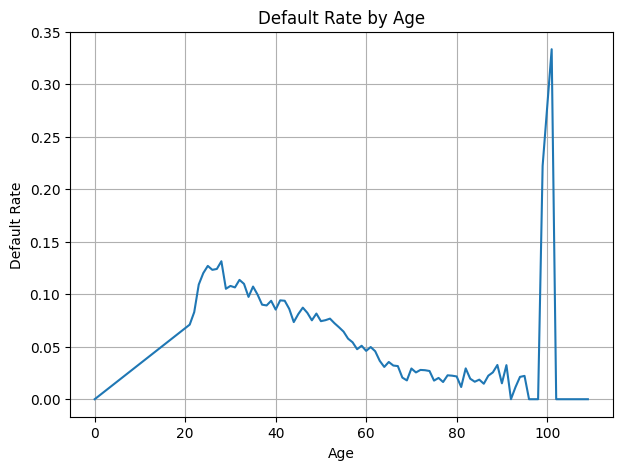

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(age_default.index, age_default.values)
plt.xlabel("Age")
plt.ylabel("Default Rate")
plt.title("Default Rate by Age")
plt.grid(True)
plt.show()


### Very young ages → HIGH risk: 
- Around ~20–30:
    * Default rate peaks around 12–13%
    * This is much higher than the dataset average SeriousDlqin2yrs value (~7%)

This means:

    Young borrowers are significantly more likely to default.

# Let create age bins, to capture the non linear relation between age and defaulting 

In [8]:
data["age_group"] = pd.cut(data["age"], bins=[20,30,40,50,60,70,100])

In [11]:
data.info()
data.describe(include="all")
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 13 columns):
 #   Column                                Non-Null Count   Dtype   
---  ------                                --------------   -----   
 0   Unnamed: 0                            150000 non-null  int64   
 1   SeriousDlqin2yrs                      150000 non-null  int64   
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64 
 3   age                                   150000 non-null  int64   
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64   
 5   DebtRatio                             150000 non-null  float64 
 6   MonthlyIncome                         120269 non-null  float64 
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64   
 8   NumberOfTimes90DaysLate               150000 non-null  int64   
 9   NumberRealEstateLoansOrLines          150000 non-null  int64   
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  i

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_group
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,"(40, 50]"
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,"(30, 40]"
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,"(30, 40]"
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,"(20, 30]"
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,"(40, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,"(70, 100]"
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,"(40, 50]"
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0,"(50, 60]"
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,"(20, 30]"


In [10]:
TARGET = "SeriousDlqin2yrs"

clean_data = data.dropna()

X = clean_data.drop(columns=[TARGET, "Unnamed: 0"])
y = clean_data[TARGET]


# Let's first one-hot encode that age group values

In [12]:
categorical_cols = X.select_dtypes(include="category").columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# NOW let's see what the data looks like and clean it

In [14]:
X

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"age_group_(30, 40]","age_group_(40, 50]","age_group_(50, 60]","age_group_(60, 70]","age_group_(70, 100]"
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,False,True,False,False,False
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,True,False,False,False,False
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,True,False,False,False,False
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,False,False,False,False,False
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149994,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0,False,True,False,False,False
149995,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,False,False,False,False,True
149996,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,False,True,False,False,False
149998,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,False,False,False,False,False


# Now let's split the data

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

In [16]:
X_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"age_group_(30, 40]","age_group_(40, 50]","age_group_(50, 60]","age_group_(60, 70]","age_group_(70, 100]"
113754,0.006085,47,0,0.001200,6666.0,6,0,0,0,3.0,False,True,False,False,False
3889,0.031034,56,0,0.199175,16000.0,9,0,2,0,2.0,False,False,True,False,False
14027,0.979723,64,0,0.402009,6571.0,5,0,1,0,0.0,False,False,False,True,False
113679,0.028219,69,0,0.024263,1730.0,5,0,0,0,0.0,False,False,False,True,False
47983,0.830028,43,1,0.603215,5100.0,5,0,1,0,1.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48268,0.000000,55,0,0.470243,10400.0,8,0,3,0,0.0,False,False,True,False,False
109003,0.916217,60,0,0.700442,6562.0,20,0,2,0,1.0,False,False,True,False,False
90041,0.230504,52,0,0.148581,4791.0,5,0,0,0,0.0,False,False,True,False,False
131160,1.000000,31,1,0.294857,4218.0,4,1,0,0,2.0,True,False,False,False,False


# Now let's create the model
## 1 - First a Dummy classify model as our baseline

In [17]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report
baseline = DummyClassifier(strategy="most_frequent")

baseline.fit(X_train,y_train)

y_pred_baseline = baseline.predict(X_test)
print("Baseline accuracy:", accuracy_score(y_test, y_pred_baseline))
print(classification_report(y_test, y_pred_baseline))


Baseline accuracy: 0.9305195237144948
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     27977
           1       0.00      0.00      0.00      2089

    accuracy                           0.93     30066
   macro avg       0.47      0.50      0.48     30066
weighted avg       0.87      0.93      0.90     30066



/Users/arissalimi/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/arissalimi/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/arissalimi/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{me

## 2 - Now let's create our logistic regression model

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000,class_weight='balanced')

model.fit(X_train,y_train)

/Users/arissalimi/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

# Checking the top coefficient

In [19]:
def top_coefficients(model, feature_names, top_k: int = 15) -> pd.DataFrame:
    """
    For logistic regression: returns strongest coefficients by absolute value.
    """
    coefs = pd.Series(model.coef_[0], index=feature_names)
    coefs = coefs.reindex(coefs.abs().sort_values(ascending=False).index)
    out = coefs.head(top_k).to_frame(name="coef")
    out["abs_coef"] = out["coef"].abs()
    return out

In [20]:
top_coefficients(model,X_train.columns,top_k=15)

,coef,abs_coef
NumberOfTimes90DaysLate,0.650716,0.650716
NumberOfTime30-59DaysPastDueNotWorse,0.582275,0.582275
"age_group_(60, 70]",-0.228664,0.228664
"age_group_(30, 40]",0.160841,0.160841
NumberOfTime60-89DaysPastDueNotWorse,0.152426,0.152426
"age_group_(70, 100]",-0.137457,0.137457
"age_group_(40, 50]",0.115240,0.115240
"age_group_(50, 60]",0.108138,0.108138
NumberRealEstateLoansOrLines,0.090398,0.090398
NumberOfDependents,0.058479,0.058479


# So now, let's predict the probality of each class 

In [21]:
from sklearn.metrics import precision_recall_curve
y_proba = model.predict_proba(X_test)[:, 1] # This will outputs probabilities for class 1. cause we're ostly care bout class 1. So, this line does not claasify, No threshold applied yet. Just risk scores.
precision, recall, thresholds = precision_recall_curve(y_test, y_proba) # This function tests every possible threshold from 0 → 1 and computes Precision at each threshold and also Recall at each threshold

In [27]:
from sklearn.metrics import auc
# Step 2 — compute area under curve
pr_auc = auc(recall, precision)

print("PR-AUC:", pr_auc)

PR-AUC: 0.32656141216546253


# Now, let Plot the Precision-Recall Curve to visually see the trade-off.

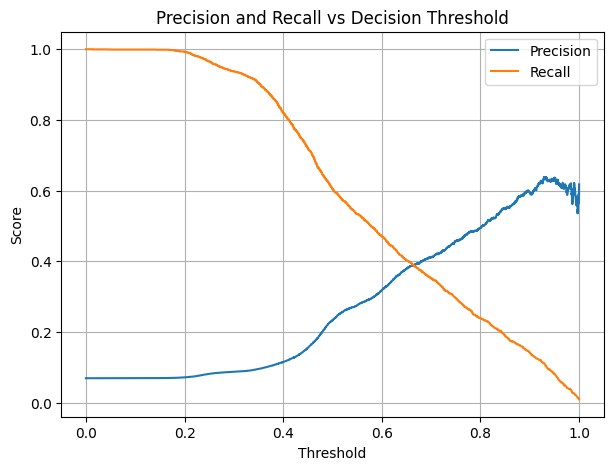

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Decision Threshold")
plt.legend()
plt.grid(True)
plt.show()


## Base on this curve, we can see that the good Balanced trade-off between recall and precision is around 0.65, so let's use it as threshold

In [24]:
threshold = 0.65
y_pred = (y_proba >= threshold).astype(int)


# Let's report now

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.95      0.95     27977
           1       0.38      0.40      0.39      2089

    accuracy                           0.91     30066
   macro avg       0.67      0.68      0.67     30066
weighted avg       0.92      0.91      0.91     30066



### Analyse of the metrics:

For class 0:

Precision 0.96 → when model predicts “safe”, it’s almost always correct (96% of the time)
Recall 0.95 → it correctly identifies most safe borrowers

For class 1: 

Precision 0.38 → Only 38% of people flagged as defaulters are actually defaulters,so 62% are false alarms.
Recall 0.40 → Model catches 40% of all real defaulters, so 59% of defaulters are missed

### Interpretation of PR-AUC

So, my PR-AUC = 0.327:

In PR curves, the baseline equals the proportion of positives.

In the dataset:

Defaulters ≈ 7% (positif class)
so, the Baseline PR-AUC ≈ 0.07


# Conclusion

The dataset is highly imbalanced (~7% defaults), which makes accuracy unreliable as a performance metric. While the model performs very well in identifying non-defaulters (precision 0.96, recall 0.95), its ability to detect actual defaulters remains limited (recall 0.40). This indicates significant overlap between borrower profiles and highlights the limitations of linear models in separating high-risk cases. Threshold tuning improved recall slightly but further gains would likely require non-linear models.

Given the strong class imbalance (~7% defaults), PR-AUC was also used asmetric.
The logistic regression model achieved a PR-AUC of 0.327, substantially above the random
baseline (~0.07), indicating strong discriminative power in ranking high-risk borrowers.
This confirms that even with moderate precision and recall at a fixed threshold, the model
provides meaningful risk separation across the population.
